In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")



In [5]:
matches = pd.read_csv("../data/raw/matches.csv")
deliveries = pd.read_csv("../data/raw/deliveries.csv")

matches.head(), deliveries.head()


(       id   season        city        date match_type player_of_match  \
 0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
 1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
 2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
 3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
 4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   
 
                                         venue                        team1  \
 0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
 1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
 2                            Feroz Shah Kotla             Delhi Daredevils   
 3                            Wankhede Stadium               Mumbai Indians   
 4                                Eden Gardens        Kolkata Knight Riders   
 
                          team2                  toss_winner toss_decision  \


In [6]:
print("Matches Dataset:")
display(matches.info())
print("\nDeliveries Dataset:")
display(deliveries.info())


Matches Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 1

None


Deliveries Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder          

None

In [7]:
print("Null values in matches:")
display(matches.isnull().sum())

print("\nNull values in deliveries:")
display(deliveries.isnull().sum())



Null values in matches:


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


Null values in deliveries:


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [8]:
# Remove rows where result is NA (optional)
matches = matches.dropna(subset=['winner'])

# Fill venue missing values if any (safe fill)
matches['city'] = matches['city'].fillna("Unknown")


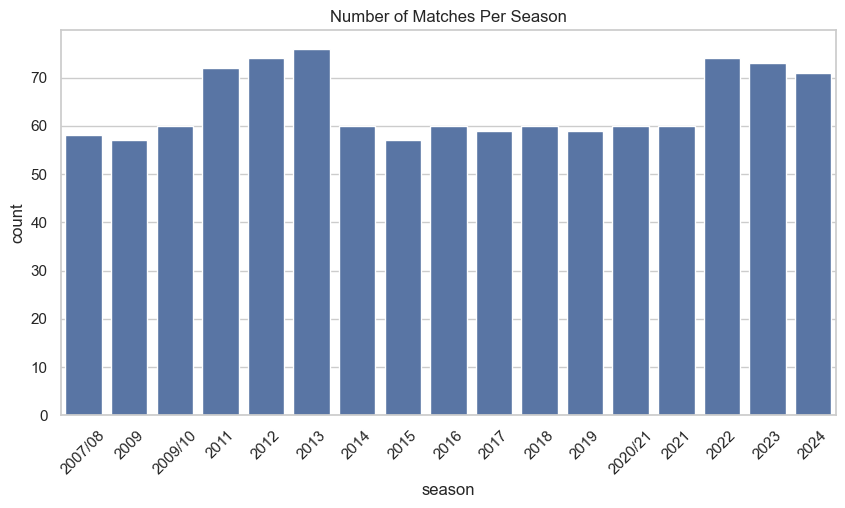

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=matches, x='season')
plt.title("Number of Matches Per Season")
plt.xticks(rotation=45)
plt.show()


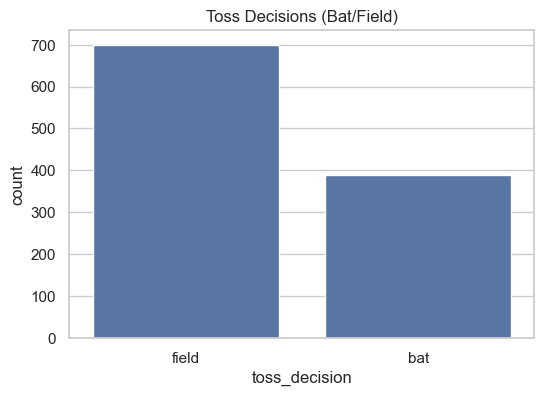

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=matches, x='toss_decision')
plt.title("Toss Decisions (Bat/Field)")
plt.show()


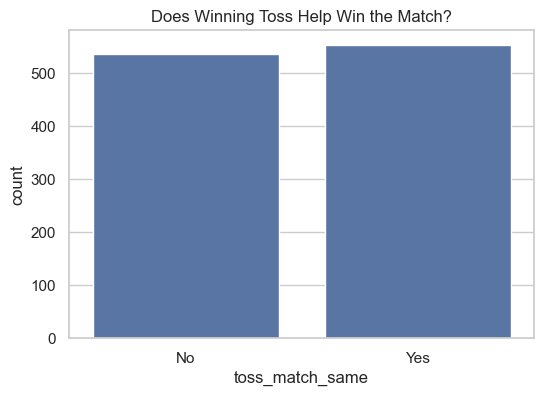

np.float64(0.5082568807339449)

In [11]:
matches['toss_match_same'] = np.where(matches['toss_winner'] == matches['winner'], 1, 0)

plt.figure(figsize=(6,4))
sns.countplot(x='toss_match_same', data=matches)
plt.title("Does Winning Toss Help Win the Match?")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

matches['toss_match_same'].mean()


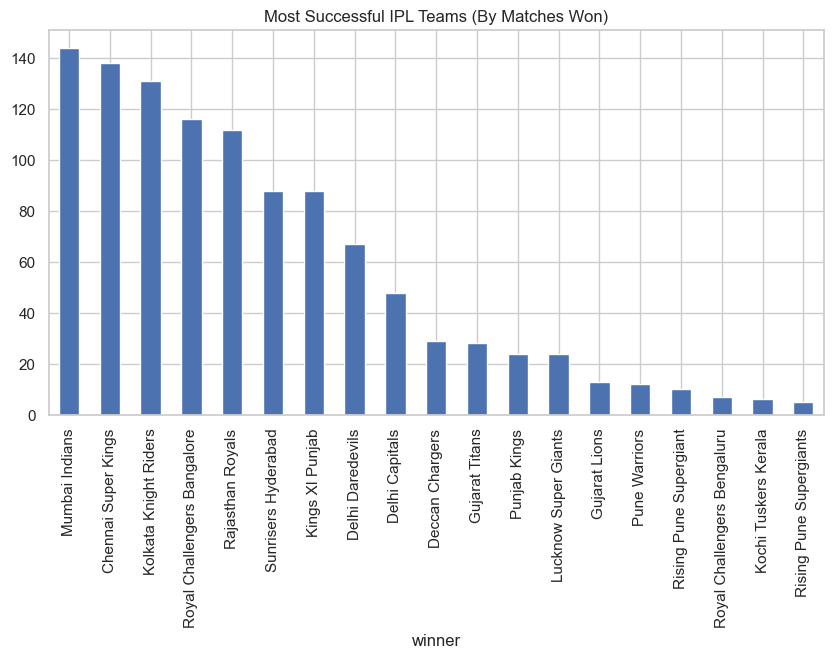

In [12]:
plt.figure(figsize=(10,5))
matches['winner'].value_counts().plot(kind='bar')
plt.title("Most Successful IPL Teams (By Matches Won)")
plt.show()
